In [28]:
# Load the Iris dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
iris_flower = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [29]:
# Data Analysis
iris_flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [30]:
iris_flower.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
iris_flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [32]:
iris_flower.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

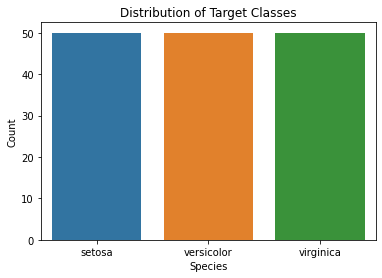

In [33]:
# Visualize the distribution of target classes
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=iris_flower)
plt.title('Distribution of Target Classes')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

In [35]:
# Split the data into features (X) and target labels (y)
y = iris_flower['target']
X = iris_flower[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

In [36]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [37]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2529)

In [38]:
# Choose a classification algorithm (K-Nearest Neighbors in this case)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# Make predictions on the test data
y_pred = knn_model.predict(X_test)

In [40]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [41]:
print(accuracy)

0.9333333333333333


In [42]:
print(conf_matrix)

[[10  0  0]
 [ 0  5  0]
 [ 0  2 13]]


In [43]:
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.71      1.00      0.83         5
           2       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.90      0.96      0.92        30
weighted avg       0.95      0.93      0.94        30

